In [1]:
!pip install meteostat scikit-learn pandas

In [2]:
#Importamos librerías necesarias:
from datetime import datetime
from meteostat import Point
from meteostat import Hourly
from meteostat import Daily
from meteostat import Monthly

import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [3]:
# Definir las coordenadas de las ciudades
cities = {
    'Alicante': Point(38.3452, -0.4810),
    'Palma': Point(39.5696, 2.6502),
    'Las Palmas': Point(28.1235, -15.4363),
    'Girona': Point(41.9818, 2.8249),
    'Malaga': Point(36.7213, -4.4216)
}

# Definir el rango de fechas
start = pd.Timestamp('2010-01-01')
end = pd.Timestamp('2023-12-31')

# Crear un DataFrame vacío para almacenar los datos
all_data = pd.DataFrame()

In [8]:
# Iterar sobre las ciudades y obtener los datos
for city, point in cities.items():
    data = Daily(point, start, end)
    data = data.fetch()
    data['city'] = city
    
    # Asegurarse de que el índice esté en formato datetime antes de añadir columnas
    data.index = pd.to_datetime(data.index)
    
    # Concatenar los datos
    all_data = pd.concat([all_data, data])

In [35]:
# Definir las coordenadas de cada ciudad
city_coordinates = {
    'Malaga': (36.72016, -4.42034),
    'Girona': (41.98311, 2.82493),
    'Alicante': (38.34517, -0.48149),
    'Las Palmas': (28.09973, -15.41343),
    'Palma': (39.56939, 2.65024)
}

# Añadir las coordenadas al DataFrame
for city, coordinates in city_coordinates.items():
    all_data.loc[all_data['city'] == city, 'latitude'] = coordinates[0]
    all_data.loc[all_data['city'] == city, 'longitude'] = coordinates[1]

# Verificar el DataFrame actualizado
print(all_data.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                        
2010-01-01  13.3   5.4  16.6   0.0   NaN  251.0  20.9   NaN  1011.5   NaN   
2010-01-02  12.7   7.2  17.0   0.0   NaN  268.0  11.3   NaN  1019.7   NaN   
2010-01-03  11.9   3.8  16.7   0.0   NaN    NaN   6.2   NaN  1018.4   NaN   
2010-01-04  13.8   8.7  15.8   NaN   NaN    NaN   4.8   NaN  1009.6   NaN   
2010-01-05  14.6  10.4  16.7   NaN   NaN    NaN   7.3   NaN  1000.9   NaN   

                city  year  month  latitude  longitude  
time                                                    
2010-01-01  Alicante  2010      1  38.34517   -0.48149  
2010-01-02  Alicante  2010      1  38.34517   -0.48149  
2010-01-03  Alicante  2010      1  38.34517   -0.48149  
2010-01-04  Alicante  2010      1  38.34517   -0.48149  
2010-01-05  Alicante  2010      1  38.34517   -0.48149  


In [36]:
print(all_data.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                        
2010-01-01  13.3   5.4  16.6   0.0   NaN  251.0  20.9   NaN  1011.5   NaN   
2010-01-02  12.7   7.2  17.0   0.0   NaN  268.0  11.3   NaN  1019.7   NaN   
2010-01-03  11.9   3.8  16.7   0.0   NaN    NaN   6.2   NaN  1018.4   NaN   
2010-01-04  13.8   8.7  15.8   NaN   NaN    NaN   4.8   NaN  1009.6   NaN   
2010-01-05  14.6  10.4  16.7   NaN   NaN    NaN   7.3   NaN  1000.9   NaN   

                city  year  month  latitude  longitude  
time                                                    
2010-01-01  Alicante  2010      1  38.34517   -0.48149  
2010-01-02  Alicante  2010      1  38.34517   -0.48149  
2010-01-03  Alicante  2010      1  38.34517   -0.48149  
2010-01-04  Alicante  2010      1  38.34517   -0.48149  
2010-01-05  Alicante  2010      1  38.34517   -0.48149  


In [12]:
# Crear columnas de año y mes
all_data['year'] = all_data.index.year
all_data['month'] = all_data.index.month

In [26]:
# Agrupar por ciudad, año y mes y calcular la media de precipitación
monthly_sum = all_data.groupby(['city', 'year', 'month'])['prcp'].sum().reset_index()

In [27]:
print(monthly_sum.head())

       city  year  month  prcp
0  Alicante  2010      1  36.7
1  Alicante  2010      2  18.1
2  Alicante  2010      3  35.4
3  Alicante  2010      4  14.5
4  Alicante  2010      5  25.0


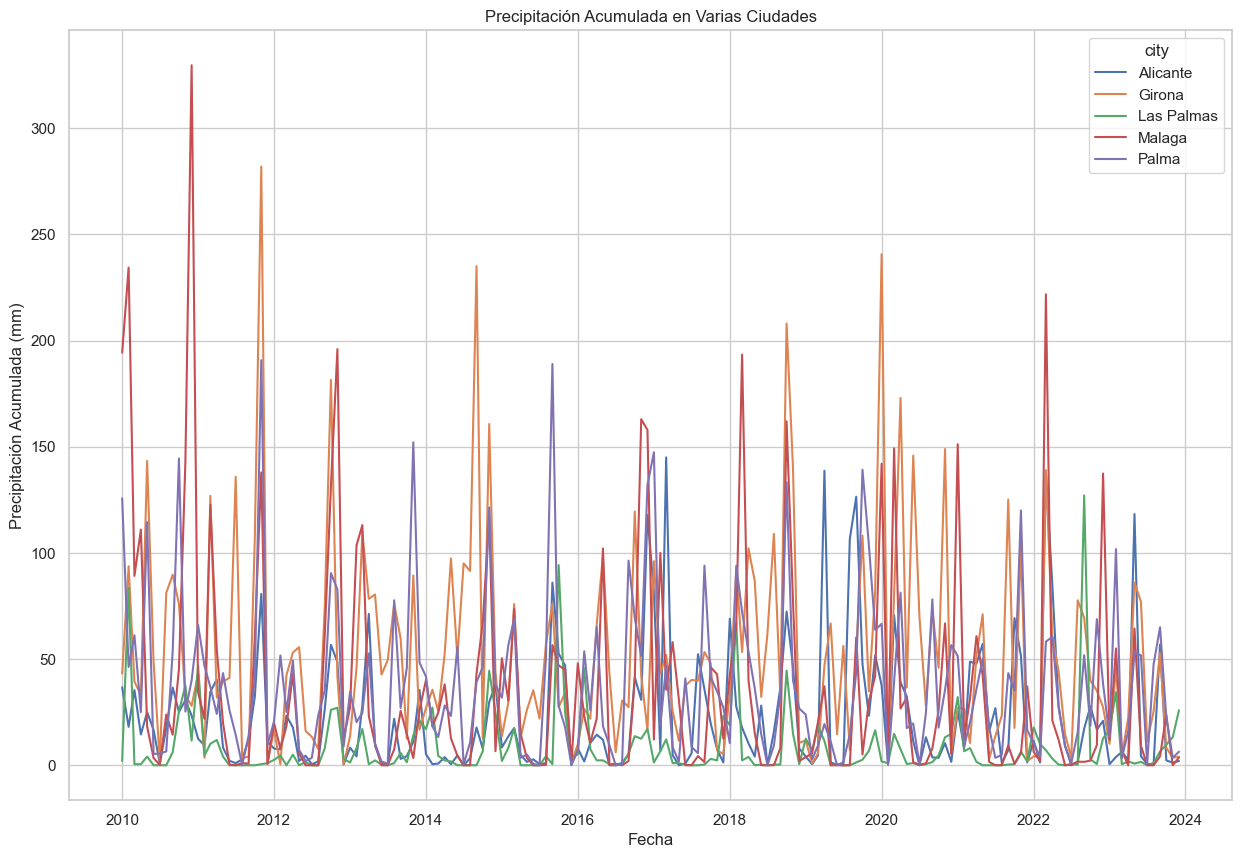

In [28]:
# Crear una columna de fecha a partir del año y el mes
monthly_sum['date'] = pd.to_datetime(monthly_sum[['year', 'month']].assign(day=1))

# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Crear el gráfico de línea
plt.figure(figsize=(15, 10))
sns.lineplot(x='date', y='prcp', hue='city', data=monthly_sum)

# Ajustar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Precipitación Acumulada (mm)')
plt.title('Precipitación Acumulada en Varias Ciudades')

# Mostrar gráfico
plt.show()

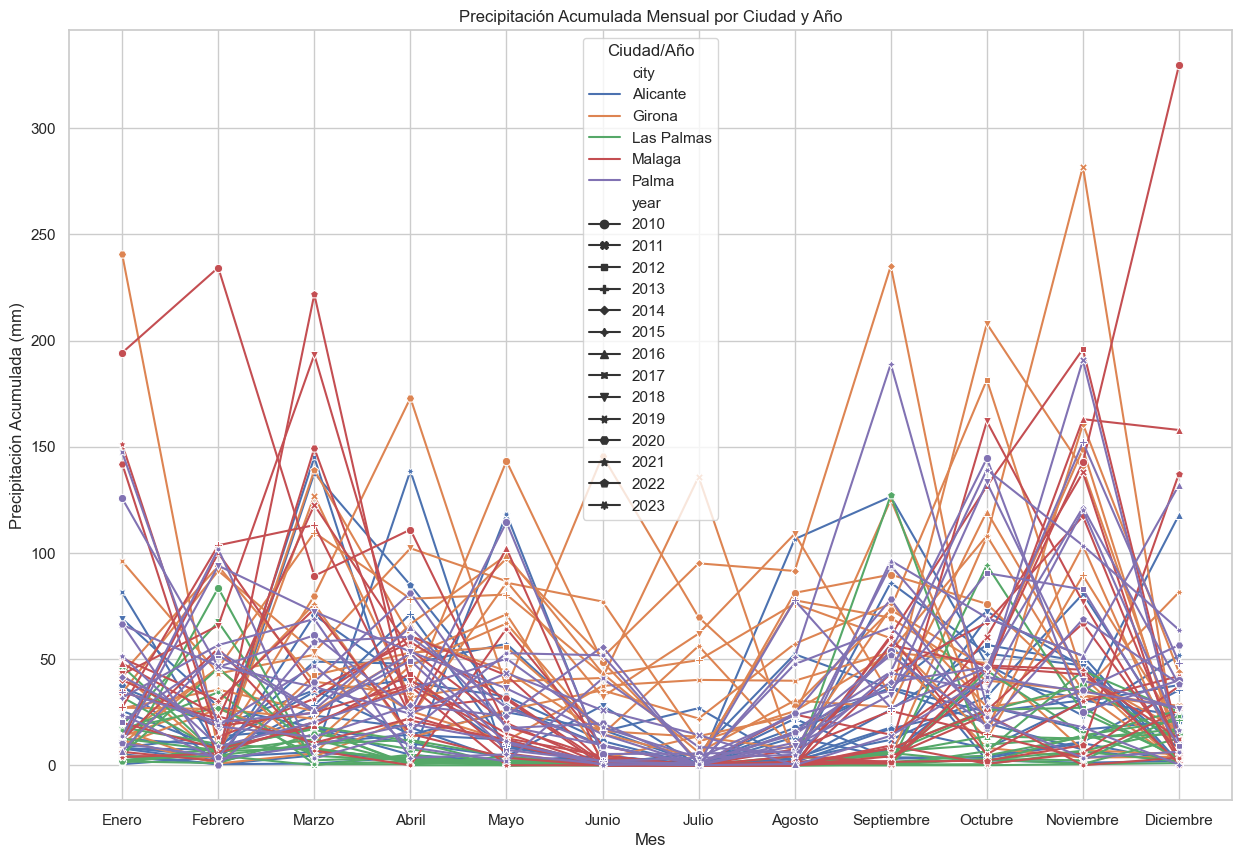

In [29]:
#Nuevo gráfico:
# Crear el gráfico
plt.figure(figsize=(15, 10))

# Usar seaborn para crear el gráfico
sns.lineplot(data=monthly_sum, x='month', y='prcp', hue='city', style='year', markers=True, dashes=False)

# Ajustar etiquetas y título
plt.ylabel('Precipitación Acumulada (mm)')
plt.xlabel('Mes')
plt.title('Precipitación Acumulada Mensual por Ciudad y Año')

# Personalizar las etiquetas del eje Y para mostrar nombres de los meses
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# Mostrar gráfico
plt.legend(title='Ciudad/Año')
plt.show()

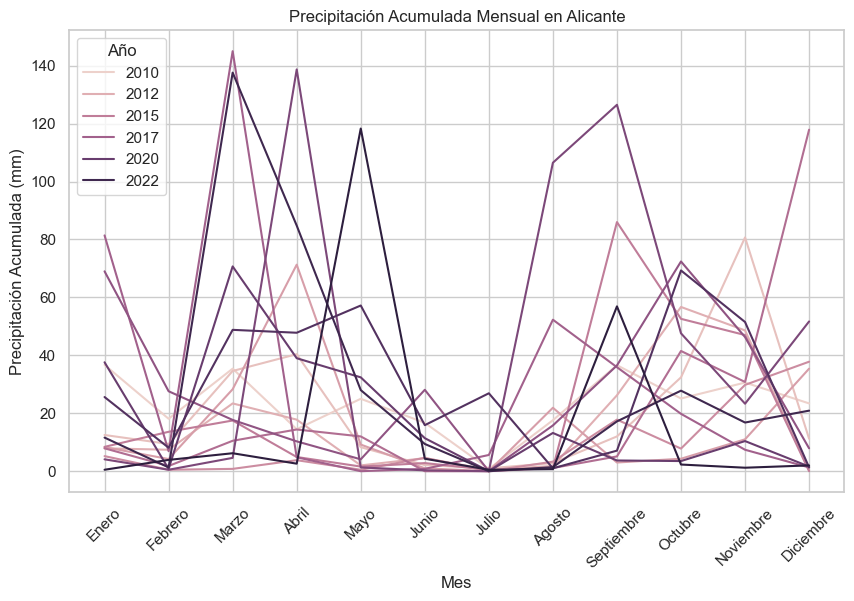

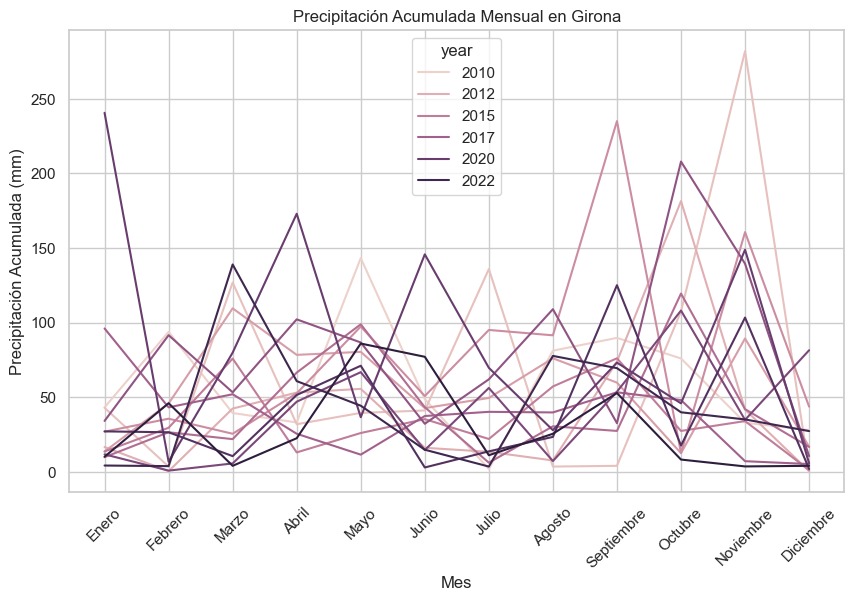

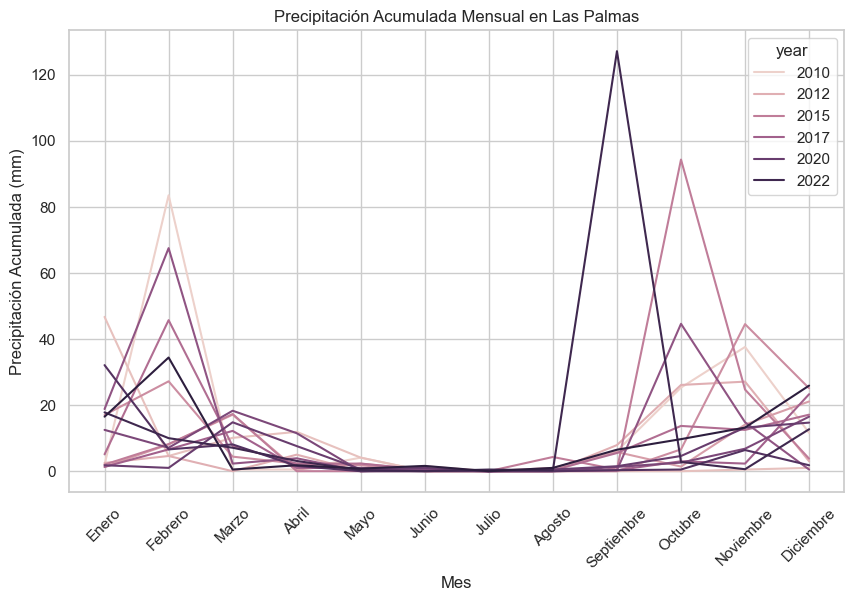

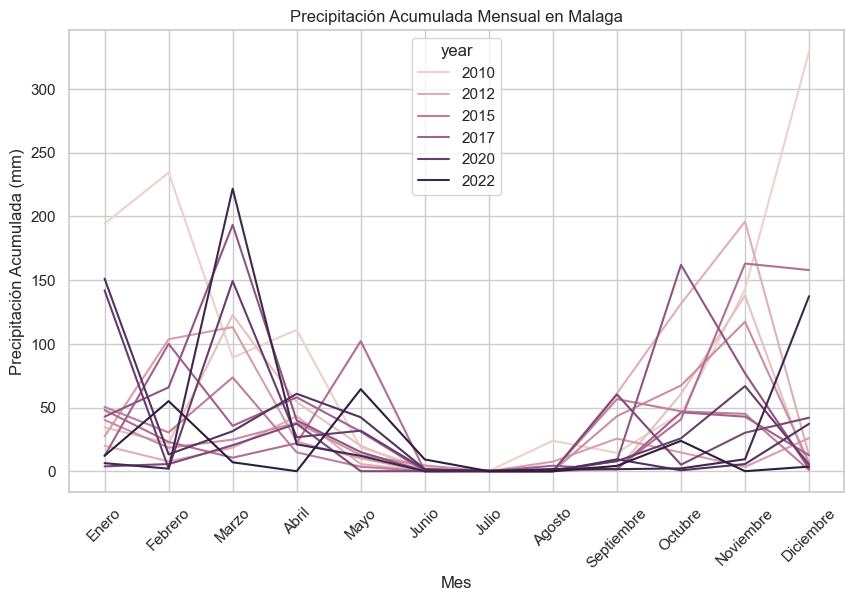

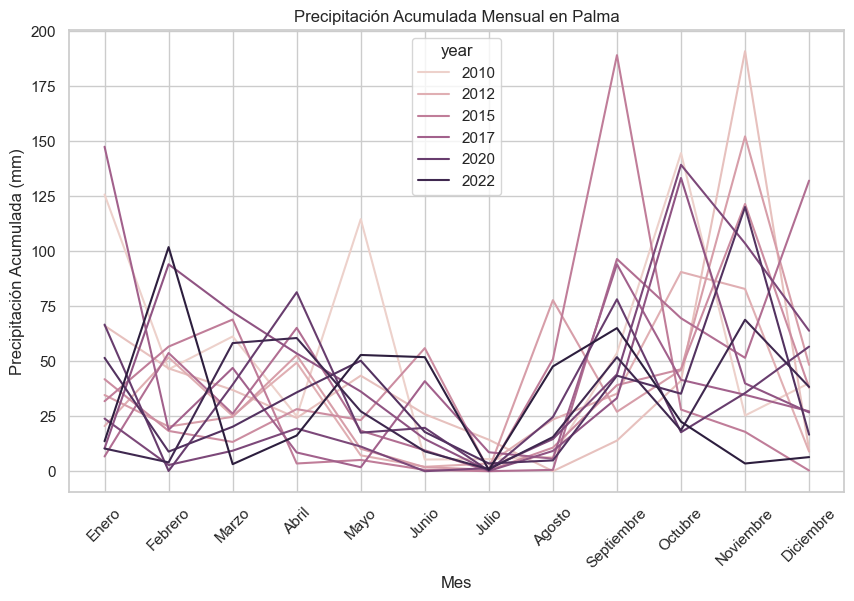

In [31]:
# Obtener la lista única de ciudades
cities_list = monthly_sum['city'].unique()

# Crear un gráfico independiente para cada ciudad
for city in cities_list:
    # Filtrar los datos por ciudad
    city_data = monthly_sum[monthly_sum['city'] == city]
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=city_data, x='month', y='prcp', hue='year', markers=True, dashes=False)
    
    # Ajustar etiquetas y título
    plt.xlabel('Mes')
    plt.ylabel('Precipitación Acumulada (mm)')
    plt.title(f'Precipitación Acumulada Mensual en {city}')
    
    # Personalizar las etiquetas del eje X para mostrar nombres de los meses
    plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
    # Poner los labels del eje Y en diagonal
    plt.xticks(rotation=45)
    
    # Mostrar leyenda solo en el primer gráfico
    if city == cities_list[0]:
        plt.legend(title='Año')
    
    # Mostrar gráfico
    plt.show()


In [33]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   --------------- ----------------------- 41.0/100.0 kB 495.5 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 823.6 kB/s eta 0:00:00


In [40]:
import folium
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa centrado en España
mapa = folium.Map(location=[40.4637, -3.7492], zoom_start=6)

# Iterar sobre cada ciudad para agregar marcadores al mapa
for city, data in all_data.groupby('city'):
    # Obtener la latitud y longitud de la ciudad
    lat = data['latitude'].iloc[0]
    lon = data['longitude'].iloc[0]
    
    # Agregar marcador al mapa
    folium.Marker([lat, lon], popup=city).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa.html')


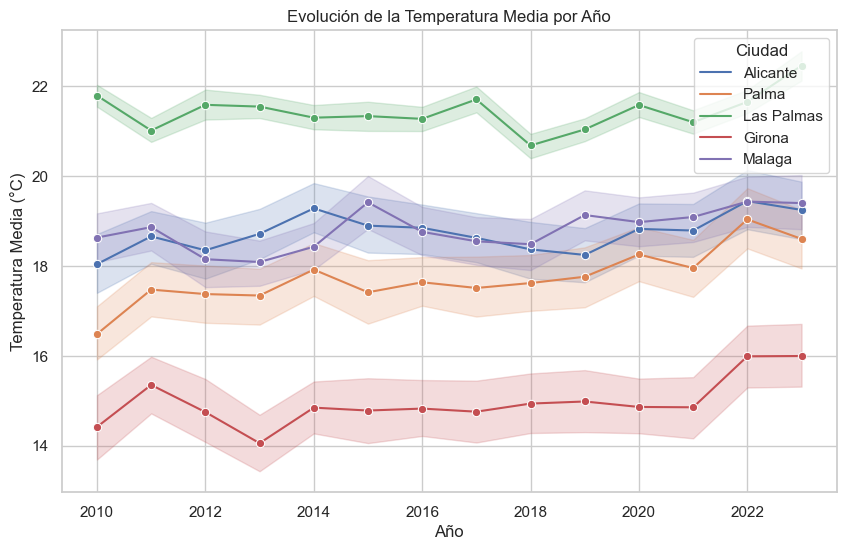

In [41]:
# Crear un gráfico de línea para la evolución de la temperatura media por años
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='year', y='tavg', hue='city', marker='o')

# Ajustar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Temperatura Media (°C)')
plt.title('Evolución de la Temperatura Media por Año')

# Mostrar gráfico
plt.legend(title='Ciudad')
plt.grid(True)
plt.show()


In [42]:
import os

# Obtener el directorio de trabajo actual
current_directory = os.getcwd()

# Imprimir la ubicación del archivo HTML
print("La ubicación del archivo HTML es:", current_directory)


La ubicación del archivo HTML es: C:\Users\mpons\Desktop\MASTER UNIR\TFM\Scripts_ajuda
